Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model loaded successfully.


Saving m8 to m8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


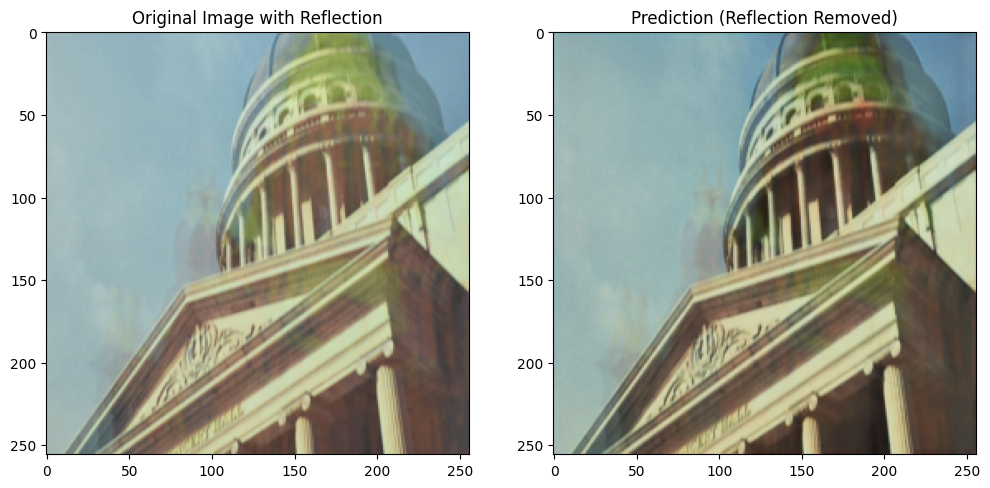

In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Path to the saved model in Google Drive
model_path = '/content/drive/MyDrive/your_model_folder/reflection_removal_unet.h5'

# Load the model (will use CPU if GPU is disabled)
model = load_model(model_path)

print("Model loaded successfully.")

# Upload an image file with reflection
uploaded = files.upload()

# Get the uploaded image filename
image_path = next(iter(uploaded))  # Get the first uploaded file

# Open the uploaded image
image = Image.open(image_path)

# Convert to a NumPy array and preprocess it (resize to the input size of the model)
input_size = (256, 256)  # Change this according to your model's input size
image = image.resize(input_size)
image_array = np.array(image) / 255.0  # Normalize if needed

# Check if the image has 3 color channels (RGB)
if image_array.shape[-1] != 3:
    print("Error: The image should have 3 channels (RGB).")
    image_array = np.repeat(image_array[:, :, np.newaxis], 3, axis=-1)  # Convert grayscale to RGB

# Expand dimensions to match the input shape of the model (add batch dimension)
image_array = np.expand_dims(image_array, axis=0)  # Shape becomes (1, 256, 256, 3)

# Make a prediction (on CPU)
prediction = model.predict(image_array)

# Display the original image and prediction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image with Reflection')

plt.subplot(1, 2, 2)
plt.imshow(prediction[0])  # Show the first image in the batch
plt.title('Prediction (Reflection Removed)')
#Showing the results
plt.show()
